In [52]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("numpy version: {}".format(np.__version__))

import scipy as sp 
print("scipy version: {}".format(sp.__version__))

import IPython 
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("sklearn version: {}".format(sklearn.__version__))

import warnings
warnings.filterwarnings("ignore")

import mglearn
import matplotlib.pyplot as plt
print("mglearn version: {}".format(mglearn.__version__))

Python version: 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.24.2
matplotlib version: 3.0.3
numpy version: 1.16.2
scipy version: 1.2.1
IPython version: 7.4.0
sklearn version: 0.20.3
mglearn version: 0.1.7


In [53]:
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"

data = pd.read_csv("data/adult.data", header=None, index_col=False, 
                  names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                          'marital-status', 'occupation', 'relationship', 'race', 'gender',
                          'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 
                          'income'])

# For illustration purpose, we only select some of cloumns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]

# IPython.display allows nice output fromatting within the Jupyter notebook
#
#from IPython import display
#display(data.head())
# change to the following codes show data. 
#data_pandas = pd.DataFrame(data)
#data_pandas
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [54]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


## One-Hot-Encoding(Dummy Variables)

It's called one-hot or one-out-of-N encoding. The following is an example to convert the __Categorical Variable__ "workclass". # workcalss has 4 text values: "Government Employee" , "Private Employee" , "Self Employed" , "Self Employed Incorporated". 

| workclass | Government Employee | Private Employee | Self Employed | Self Employed Incorporated
| --- | --- | --- | --- | --- |
| Government Employee | __1__ | 0 | 0 | 0 |
| Private Employee | 0 | __1__ | 0 | 0 |
| Self Employed  | 0 | 0 | __1__ | 0 |
| Self Employed Incorporated | 0 | 0 | 0 | __1__ |

One-Hot编码，又称为一位有效编码，主要是采用位状态寄存器来对个状态进行编码，每个状态都由他独立的寄存器位，并且在任意时候只有一位有效。在实际的机器学习的应用任务中，特征有时候并不总是连续值，有可能是一些分类值，如性别可分为“male”和“female”。在机器学习任务中，对于这样的特征，通常我们需要对其进行特征数字化. 

据经验，one-hot用在GBDT、XGBoost这些模型里面都挺好的，但是用在逻辑回归里不行。因为逻辑回归要求变量间相互独立，如果你只有一个属性需要做one-hot编码还好，如果你有多个属性需要做one-ont编码，那么当某个样本的多个one-hot属性同时为1时，这两个属性就完全相关了，必然会导致singular error，也就是非奇异矩阵不能求解唯一解，得不出唯一的模型，但是你又不可能把同一个属性的某一个one-hot延伸变量删除。

如果在逻辑回归中入模标称属性，可以直接替换成数值，然后做woe变换，用每个类别的woe值来代替原来的数值，这样既能够避免生成相关性强的变量，又能避开类别间大小无法比较的问题。

In [55]:
# call get_dummies to encode data with one hot way
# Convert categorical data into range: 0-1 
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns), "\n")
data_dummies.head()

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [56]:
import warnings
warnings.filterwarnings('ignore')

features = data_dummies.ix[:, 'age':'occupation_ Transport-moving']
# Extract Numpy arrays

X=features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape {}".format(X.shape, y.shape))

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

X.shape: (32561, 44) y.shape (32561,)
Test score: 0.81


## Numbers Can Encode Categoricals
---

In [57]:
demo_df = pd.DataFrame({'Integer Feature': [0,1,2,1],
                       'Categorical Feature': ['socks','fox', 'socks', 'box']})
demo_df

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [58]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [59]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


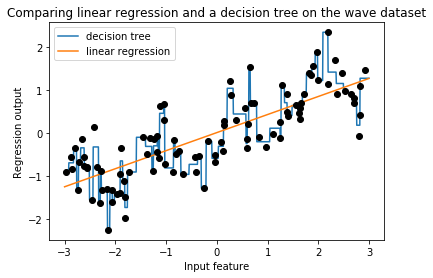

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

#print(X)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label='decision tree')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label='linear regression')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc='best')
plt.title("Comparing linear regression and a decision tree on the wave dataset")
plt.show()

In [61]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

which_bin = np.digitize(X, bins=bins)
print("\n Data points:\n ", X[:5])
print("\n Bin membership for data points:\n ", which_bin[:5])

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]

 Data points:
  [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

 Bin membership for data points:
  [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
X_binned.shape: (100, 10)


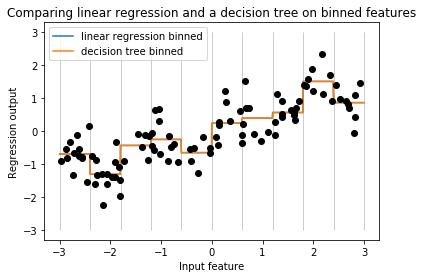

In [62]:
from sklearn.preprocessing import OneHotEncoder
# transform using the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

#encoder.fit find the unique values that appear in which_bin
encoder.fit(which_bin)

#transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])
print("X_binned.shape: {}".format(X_binned.shape))

line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=0.2)
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc='best')
plt.title("Comparing linear regression and a decision tree on binned features")
plt.show()

In [63]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

#原始数据集
data = [['自有房',40,50000],
        ['无自有房',22,13000],
        ['自有房',30,30000]]
data = pd.DataFrame(data,columns=['house','age','income'])
print(data)

print("--------------------标称属性转换为数值型------------------")
#把带中文的标称属性转换为数值型，因为one-hot编码也需要先转换成数值型，用简单整数代替即可
listUniq = data.ix[:,'house'].unique()
for j in range(len(listUniq)):
    data.ix[:,'house'] = data.ix[:,'house'].apply(lambda x:j if x==listUniq[j] else x)
print(data)

print("--------------------进行one-hot编码------------------")
#进行one-hot编码
tempdata = data[['house']]
print("Before onehot encoding")
print(tempdata)
enc = OneHotEncoder()
enc.fit(tempdata)

print("After onehot encoding")
#one-hot编码的结果是比较奇怪的，最好是先转换成二维数组
tempdata = enc.transform(tempdata).toarray()
print(tempdata)
print('取值范围整数个数：',enc.n_values_)

#再将二维数组转换为DataFrame，记得这里会变成多列
tempdata = pd.DataFrame(tempdata,columns=['house']*len(tempdata[0]))
print("-------------------------")
print(tempdata)

#每一步都输出结果看一看

  house  age  income
0   自有房   40   50000
1  无自有房   22   13000
2   自有房   30   30000
--------------------标称属性转换为数值型------------------
   house  age  income
0      0   40   50000
1      1   22   13000
2      0   30   30000
--------------------进行one-hot编码------------------
Before onehot encoding
   house
0      0
1      1
2      0
After onehot encoding
[[1. 0.]
 [0. 1.]
 [1. 0.]]
取值范围整数个数： [2]
-------------------------
   house  house
0    1.0    0.0
1    0.0    1.0
2    1.0    0.0


### 手动生成 One Hot编码

In [64]:
from numpy import argmax
# define input string
data = 'hello world'
print(data)
# define universe of possible input values
alphabet = 'abcdefghijklmnopqrstuvwxyz '
# define a mapping of chars to integers
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))
# integer encode input data
integer_encoded = [char_to_int[char] for char in data]
print(integer_encoded)
# one hot encode
onehot_encoded = list()
for value in integer_encoded:
       letter = [0 for _ in range(len(alphabet))]
       letter[value] = 1
       onehot_encoded.append(letter)
print(onehot_encoded)
# invert encoding
inverted = int_to_char[argmax(onehot_encoded[0])]
print(inverted)


hello world
[7, 4, 11, 11, 14, 26, 22, 14, 17, 11, 3]
[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
h


### 基于scikit-learn OneHotEncoder

In [65]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print('-------- get values from the data array above --------')
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

print('------- integer encode with LabelEncoder ------- ')
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

print('------- reshape integer_encoded ------- ')
print(integer_encoded)

onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

print('------- onehot encode with OneHotEncoder ------- ')
print(onehot_encoded)

# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print('------- invert first example ------- ')
print(inverted)


-------- get values from the data array above --------
['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
------- integer encode with LabelEncoder ------- 
[0 0 2 0 1 1 2 0 2 1]
------- reshape integer_encoded ------- 
[[0]
 [0]
 [2]
 [0]
 [1]
 [1]
 [2]
 [0]
 [2]
 [1]]
------- onehot encode with OneHotEncoder ------- 
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
------- invert first example ------- 
['cold']


### 基于keras to_categorical

In [66]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
# define example
##对字符串
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
 
##对数值
#data=[1, 3, 2, 0, 3, 2, 2, 1, 0, 1]
#data=array(data)
#print(data)
 
# one hot encode
encoded = to_categorical(integer_encoded)
print(encoded)
# invert encoding
inverted = argmax(encoded[0])
print(inverted)


['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
[0 0 2 0 1 1 2 0 2 1]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
0


## Interactions and Polynomials 

In [67]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


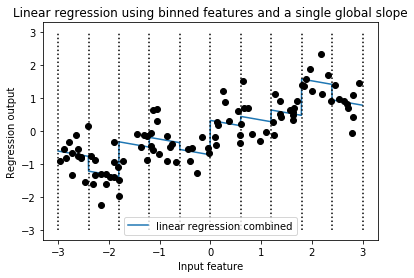

In [68]:
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc='best')
plt.plot(X[:, 0], y, 'o', c='k')
plt.title("Linear regression using binned features and a single global slope")
plt.show()

In [69]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


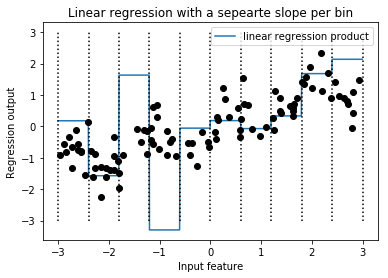

In [70]:
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line_binned * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc='best')
plt.title("Linear regression with a sepearte slope per bin")
plt.show()

X_poly.shape: (100, 10)

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]

Polynomial feature names:
['

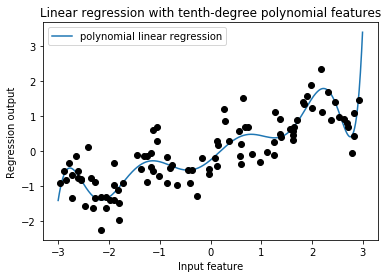

In [71]:
from sklearn.preprocessing import PolynomialFeatures

# include ploynomials up to X ** 10:
# the default "include_bias=True" adds a feature that's constantly 1 
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

print("X_poly.shape: {}".format(X_poly.shape))

print("\nEntries of X:\n{}".format(X[:5]))
print("\nEntries of X_poly:\n{}".format(X_poly[:5]))

print("\nPolynomial feature names:\n{}".format(poly.get_feature_names()))

reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc='best')
plt.title("Linear regression with tenth-degree polynomial features")
plt.show()

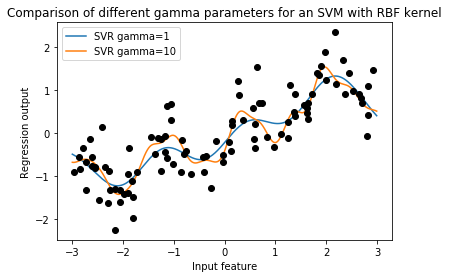

In [72]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc='best')
plt.title("Comparison of different gamma parameters for an SVM with RBF kernel")
plt.show()

## Run in boston dataset 

In [73]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# rescale data 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

print("\nPolynomial feature names:\n{}".format(poly.get_feature_names()))

# call Ridge
print("\n --- Ridge ---")
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(ridge.score(X_test_poly, y_test)))

# call RandomForestRegressor
print("\n --- RandomForestRegressor ---")
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))


X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 

## Univariate Nonlinear Transformations

Number of feature appearances: 
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


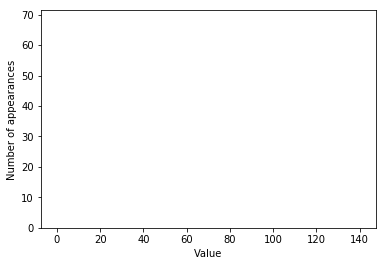

In [74]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

print("Number of feature appearances: \n{}".format(np.bincount(X[:,0])))

bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='w')
plt.ylabel("Number of appearances")
plt.xlabel("Value")
plt.show()

Test score: 0.622


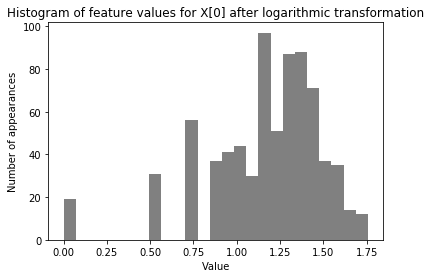

After applying log transformation, Test score: 0.875


In [75]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

# As you can see from the relatively low R2 score, 
# Ridge was not able to recally caputre the relationship between X and y. 
# Applying a logarithmic transformation can help. 

X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

plt.hist(np.log(X_train_log[:, 0] + 1), bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")
plt.title("Histogram of feature values for X[0] after logarithmic transformation")
plt.show()

score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("After applying log transformation, Test score: {:.3f}".format(score))



---
## Automatic Feature Selection
---

There are three basic strategies: 
- univariate statistics
- model-based selection
- iterative selection 

### 1. Univariate Staticstics

We compute whether there is a statistically significant relationship between each feature and the target. Then the features that are related with the highest confience are selected. It's also known as analysis of variance (ANOVA). A key property is that they only consider each feature individually. 

1. a feature will be discarded if it's only informative when combined with another features. 
2. It's very fast to compute and don't require building model.
3. It's completely independent of the model that you might want to apply after the feature selection. 
4. Feature discard based on a threshold : higher p-values (which means it's unlikely to be related to the target). Two methods to compute the threshold: 
    - 4.1 __SelectKB:__ select a fixed number k of features
    - 4.2 __SelectPercentile:__ select  a fixed percentage of features

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)

 --- mask ---
[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]

Features selected by SelectPercentile


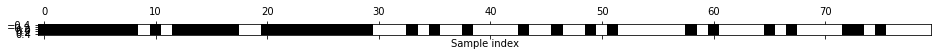

Score with all features: 0.930
Score with only selected features: 0.940


In [76]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# get deterministic random numbers

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

# add noise features to the data 
# the first 30 features are from the dataset, the next 50 are noise

X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=0.5)

# use f_classif ( the default) and SelectPercentile to select 50% of features 
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

### The number of features from 80 down to 40. ####

print("\n --- mask ---")
mask = select.get_support()
print(mask)

print("\nFeatures selected by SelectPercentile")
#visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.show()


from sklearn.linear_model import LogisticRegression

# transform test data 
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

### 2. Model-Based Feature Selection
---
It uses a supervised machine learning model to judge the importance of each feature and keeps only the most important ones. The feature selection model needs to provide some masure of importance for each feature so that they can be ranked by this masure. 

1. __feature importances:__ Decision Tree and decision tree-based model
2. __coefficients:__ Linear model



X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)

 --- mask ---
[ True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False  True False
 False False False False  True False False  True False  True  True False
 False False  True False False  True  True False False False False False
 False  True False False False False False False False  True False False
 False  True False False False False False False]

 Features selected by SelectFromModel using the RandomForestClassifier


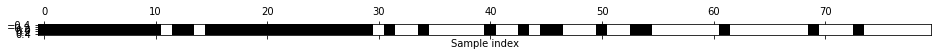

Score with all features: 0.930
Score with only selected features: 0.951


In [77]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_l1.shape))

### The number of features from 80 down to 40. ####

print("\n --- mask ---")
mask = select.get_support()
print(mask)

print("\n Features selected by SelectFromModel using the RandomForestClassifier")
#visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.show()

# transform test data 
X_test_l1 = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_l1, y_train)
print("Score with only selected features: {:.3f}".format(lr.score(X_test_l1, y_test)))

### 3. Iterative Feature Selection

It leverages a series of models which are built with varying numbers of features. 

1. Starting with no features and adding fetures one by one until some stopping criterion is reached. 
2. Starting with all features and removing features one by one until some stopping criterion is reached. 

For example, recursive feature elimination(__RFE__) starts with all features, builds a model, and discards the least important feature according to the model. Then a new model is built using all but the discarded feature, and so on until only a prespecified number of features are left. 


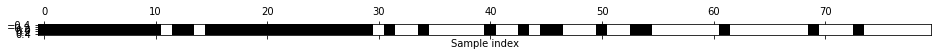

Score with all features: 0.930
Score with only selected features: 0.951
Test score: 0.951


In [78]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)

select.fit(X_train, y_train)
#visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.show()

X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_rfe, y_train)
print("Score with only selected features: {:.3f}".format(lr.score(X_test_rfe, y_test)))
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

## Utilizing Expert Knowledge

This task is to predict bicycle rentals in front of Andreas's house. 

Citi Bike data: 
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64
----+++-----


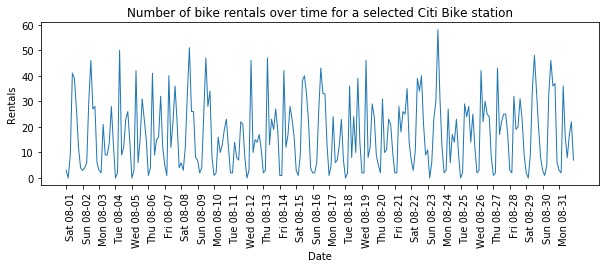

In [79]:
citibike = mglearn.datasets.load_citibike()
print("Citi Bike data: \n{}".format(citibike.head()))
print("----+++-----")
#print(citibike)
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')

plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")
plt.title("Number of bike rentals over time for a selected Citi Bike station")
plt.show()

In [82]:
# extract the target values (number of rentals)
y = citibike.values
print(y.shape)
# print(dir(citibike.index.strftime("%s").astype("int")))
# convert the time to POSIX time using "%s"
X = citibike.index.strftime("%s").astype("int").values.reshape(-1, 1)
print(X.shape)

# use the first 184 data points for training, and the rest for testing 
n_train = 184

# function to evaluate and plot a regressor on a given feature set 
def eval_on_features(features, target, regressor):
    # split the given feature into a training dataset and test dataset
    X_train, X_test = features[:n_train], features[n_train:]
    
    # also splipt the target array
    y_train, y_test = target[:n_train], target[n_train:]
    
    print("features.shape: {}".format(features.shape))
    print("target.shape: {}".format(target.shape))
    print("X_train.shape: {}".format(X_train.shape))
    print("y_train.shape: {}".format(y_train.shape))
    print("X_test.shape: {}".format(X_test.shape))
    print("y_test.shape: {}".format(y_test.shape))
    
    # train model
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    
    # predict with train/test
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
    # show graph
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90, ha="left")
    
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test)+n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
    plt.plot(range(n_train, len(y_test)+n_train), y_pred, '--', label="prediction test")
    
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")
    plt.show()
    
print("Predictions made by a random forest using only the POSIX time")
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()

#eval_on_feature(X, y, regressor)


(248,)
(248, 1)
Predictions made by a random forest using only the POSIX time


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Predictions made by a random forest using only the hour of day
features.shape: (248, 1)
target.shape: (248,)
X_train.shape: (184, 1)
y_train.shape: (184,)
X_test.shape: (64, 1)
y_test.shape: (64,)
Test-set R^2: 0.60


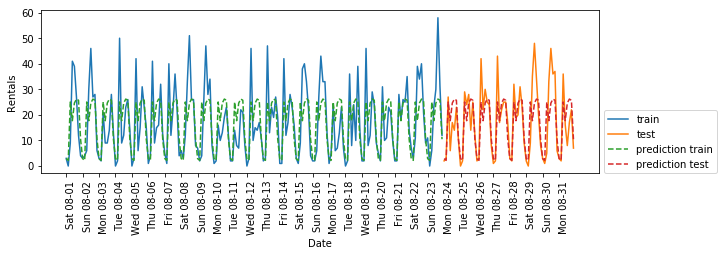

In [83]:
print("Predictions made by a random forest using only the hour of day")
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

Predictions with a random forest using day of week and hour of day features
features.shape: (248, 2)
target.shape: (248,)
X_train.shape: (184, 2)
y_train.shape: (184,)
X_test.shape: (64, 2)
y_test.shape: (64,)
Test-set R^2: 0.84


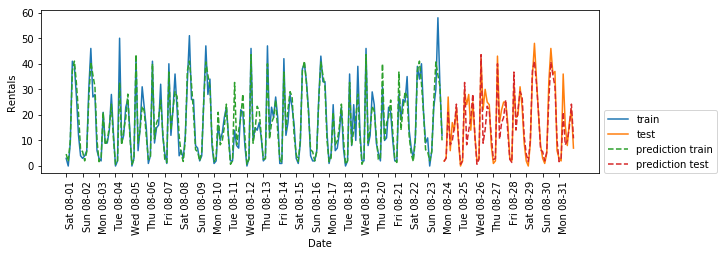

In [84]:
print("Predictions with a random forest using day of week and hour of day features")
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

Predictions made by linear regression using day of week and hour of day features
features.shape: (248, 2)
target.shape: (248,)
X_train.shape: (184, 2)
y_train.shape: (184,)
X_test.shape: (64, 2)
y_test.shape: (64,)
Test-set R^2: 0.13


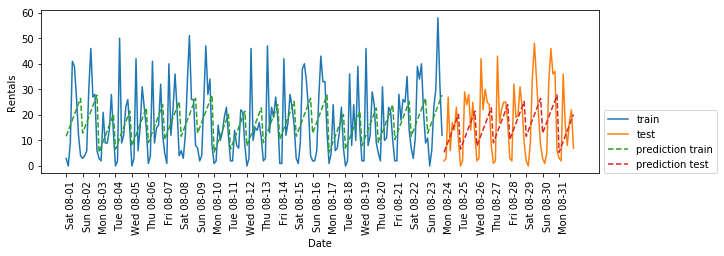

In [85]:
print("Predictions made by linear regression using day of week and hour of day features")
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

Predictions with a linear regresison using a one-hot encoding of hour of day and day of week
features.shape: (248, 15)
target.shape: (248,)
X_train.shape: (184, 15)
y_train.shape: (184,)
X_test.shape: (64, 15)
y_test.shape: (64,)
Test-set R^2: 0.62


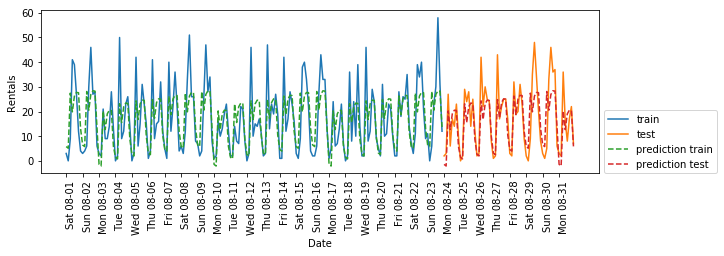

In [86]:
print("Predictions with a linear regresison using a one-hot encoding of hour of day and day of week")
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y, Ridge())

Predictions with a linear regression using a product of the day of week and hour of day features
features.shape: (248, 120)
target.shape: (248,)
X_train.shape: (184, 120)
y_train.shape: (184,)
X_test.shape: (64, 120)
y_test.shape: (64,)
Test-set R^2: 0.14


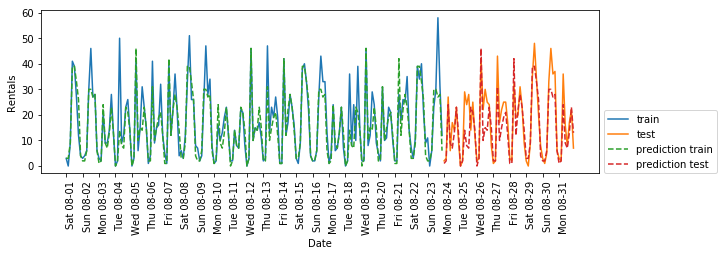

In [87]:
print("Predictions with a linear regression using a product of the day of week and hour of day features")
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [88]:
print("Coefficients of the linear regression model using a product of hour and day")
hour = ["%02d:00" % i for i in range(0,24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour

features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ !=0]
coef_nonzero = lr.coef_[lr.coef_ !=0]

plt.figure(figsize=(15,2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arrange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature magnitude")
plt.ylabel("Feature")


Coefficients of the linear regression model using a product of hour and day


IndexError: too many indices for array